# Clustering

In [ ]:
# 'max_eigenvalues' now contains the maximum eigenvalue for each correlation matrix
from sklearn.cluster import KMeans
import numpy as np
# Convert mean_corrs to a 2D NumPy array
X = np.array(mean_correlations).reshape(-1, 1)

# Define the number of clusters (states)
n_clusters = 4

# Initialize the k-means clustering model
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Create empty lists for each state
S1 = []
S2 = []
S3 = []
S4 = []

# Assign each mean correlation value to a state based on its cluster label
for i, label in enumerate(labels):
    if label == 0:
        S1.append(mean_correlations[i])
    elif label == 1:
        S2.append(mean_correlations[i])
    elif label == 2:
        S3.append(mean_correlations[i])
    else:
        S4.append(mean_correlations[i])

# Print the mean correlation values for each state
print("S1 mean correlation:", S1)
print("S2 mean correlation:", S2)
print("S3 mean correlation:", S3)
print("S4 mean correlation:", S4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


S1 mean correlation: [0.4423452173863114, 0.43064444038183697, 0.3994063084319446, 0.39713667983377426, 0.5255382577419855, 0.4714430782930532, 0.4214208905232477, 0.4261414838383354, 0.40069409311111565, 0.4136894110463102, 0.46998195486127475, 0.40528426059362366, 0.4110643269100067, 0.49058257383918763, 0.4371651065957953, 0.506138320393281, 0.4971390140420076, 0.41375173310558433, 0.43434793233517327, 0.42272760386863484, 0.4001865511200429, 0.4307224832433737, 0.521137806711702, 0.5490814399788372, 0.456201000806428, 0.5226250134843342, 0.4665259325975988, 0.43981432224130523, 0.518758264269865, 0.42512948899209985, 0.4125787022780054, 0.4802375664509456, 0.41839118160053884, 0.41434233056428316, 0.40418795540349484, 0.4398375400872399, 0.5149244497432325, 0.45367394809925665, 0.4661887400515978, 0.4533324741945121, 0.4655755327381835, 0.4729151425425125, 0.518482439055041, 0.4177877124564502, 0.43148334544680356, 0.4996364049115452, 0.4010762908582119, 0.47196841373469095, 0.4851

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


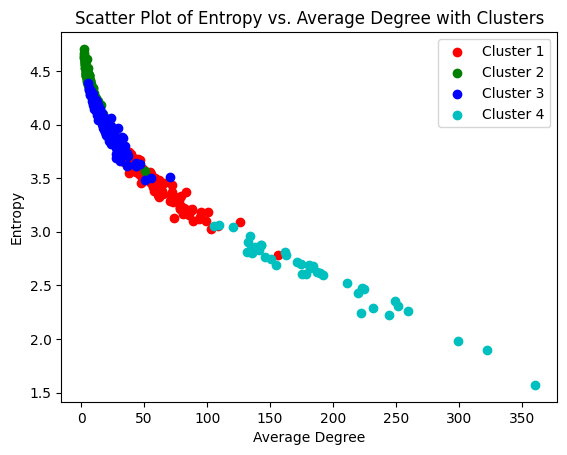

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already calculated 'entropies' and 'average_degrees' for each window
# and 'labels' containing the cluster labels for each data point

# Define cluster colors
cluster_colors = ['r', 'g', 'b', 'c']

# Create a scatter plot for all data points, with different colors for each cluster
for cluster_id in range(4):
    cluster_entropies = [entropies[i] for i in range(len(entropies)) if labels[i] == cluster_id]
    cluster_avg_degrees = [average_degrees[i] for i in range(len(average_degrees)) if labels[i] == cluster_id]
    plt.scatter(cluster_avg_degrees, cluster_entropies, c=cluster_colors[cluster_id], label=f'Cluster {cluster_id + 1}')

# Label the axes
plt.xlabel('Average Degree')
plt.ylabel('Entropy')

# Add a legend
plt.legend()

# Set plot title
plt.title('Scatter Plot of Entropy vs. Average Degree with Clusters')

# Show the plot
plt.show()



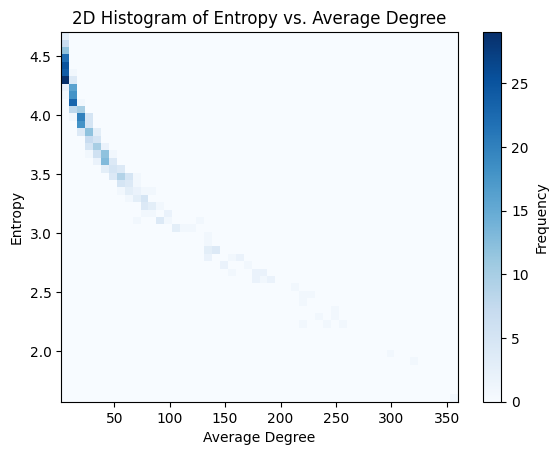

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated 'entropies' and 'average_degrees' for each window
# and 'labels' containing the cluster labels for each data point

# Convert 'entropies' to real part if it is complex
entropies = np.real(entropies)

# Create a 2D histogram or density plot
plt.hist2d(average_degrees, entropies, bins=(50, 50), cmap='Blues')

# Label the axes
plt.xlabel('Average Degree')
plt.ylabel('Entropy')

# Set plot title
plt.title('2D Histogram of Entropy vs. Average Degree')

# Show the plot
plt.colorbar(label='Frequency')
plt.show()





#  Average Degree VS Entropy Plot

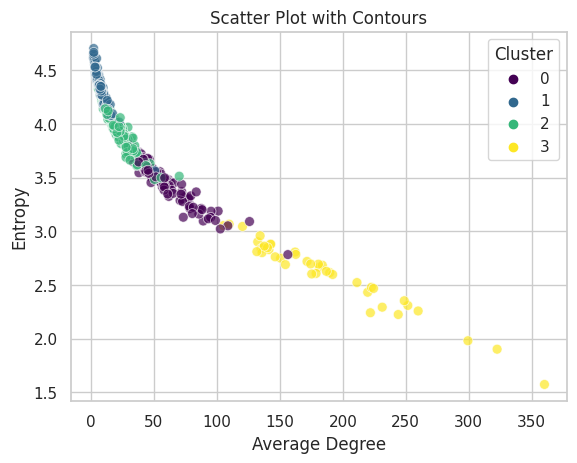

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated 'entropies' and 'average_degrees' for each window
# and 'labels' containing the cluster labels for each data point

# Combine data into a DataFrame
data = {'Average Degree': average_degrees, 'Entropy': entropies, 'Cluster': labels}
df = pd.DataFrame(data)

# Create a scatter plot with contours
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='Average Degree', y='Entropy', hue='Cluster', palette='viridis', s=50, alpha=0.7)
plt.title('Scatter Plot with Contours')

# Show the plot
plt.show()


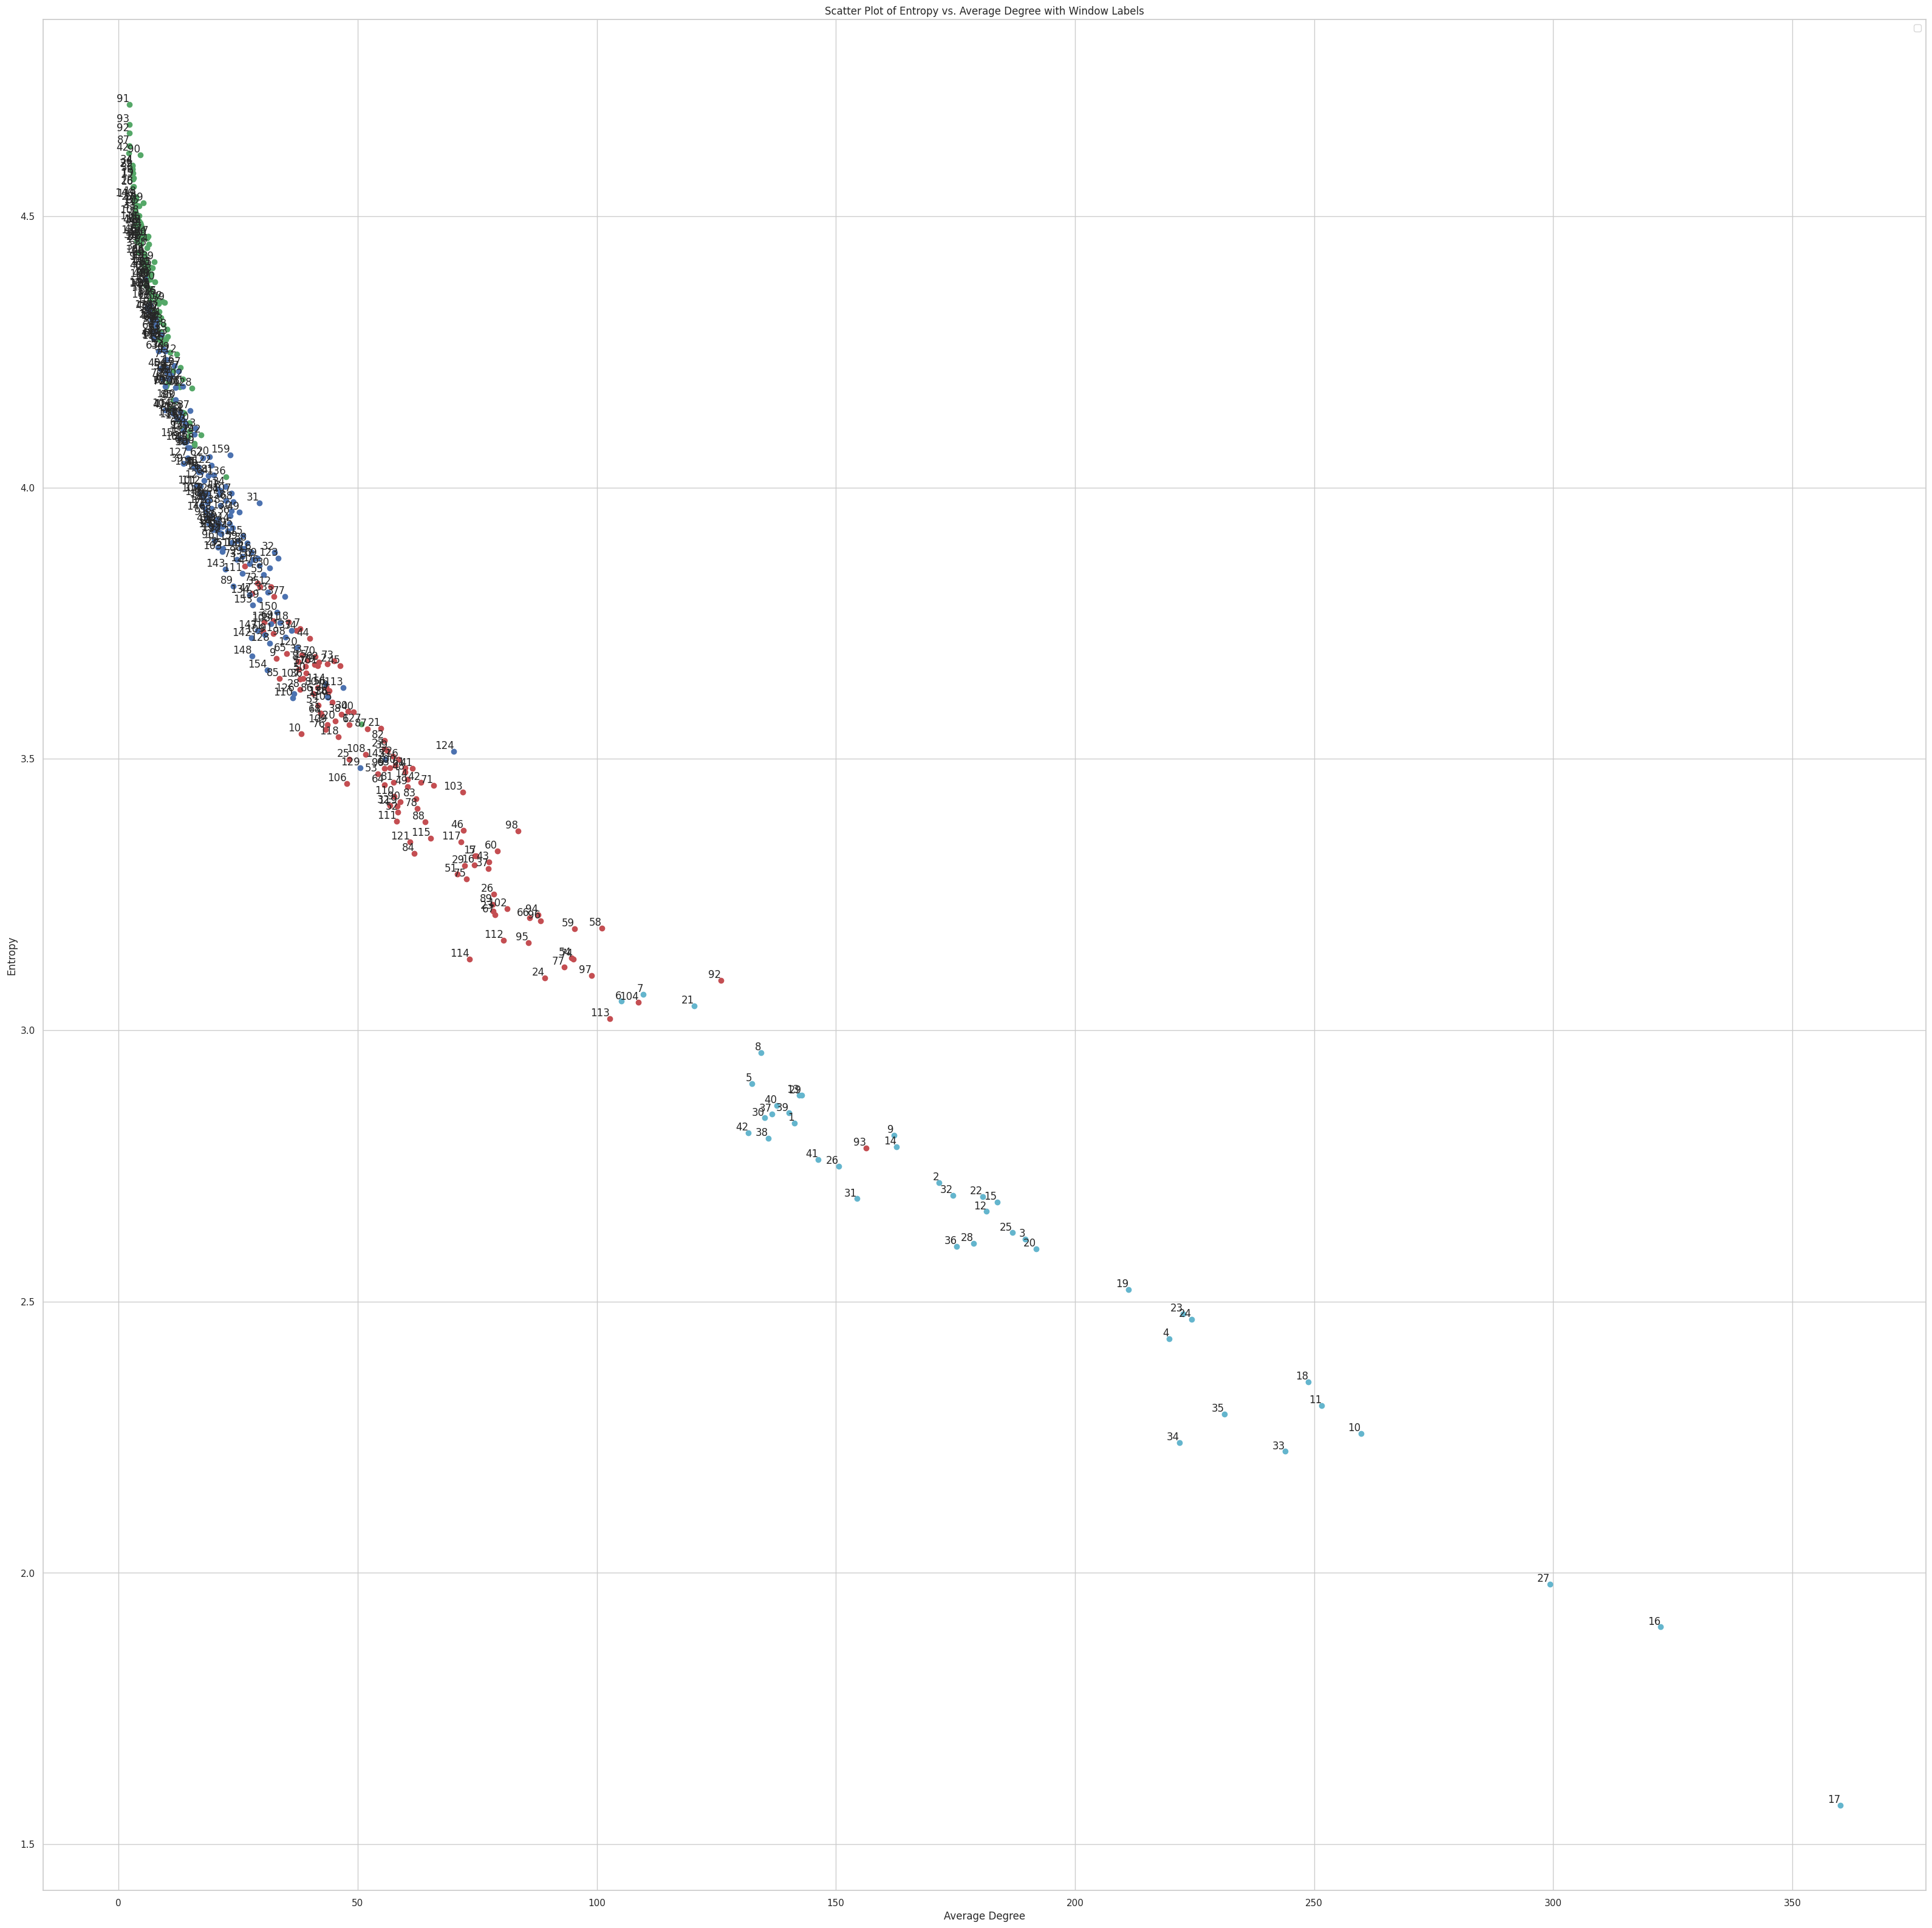

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already calculated 'entropies' and 'average_degrees' for each window
# and 'labels' containing the cluster labels for each data point

# Define cluster colors
cluster_colors = ['r', 'g', 'b', 'c']
plt.figure(figsize=(40, 40))
# Create a scatter plot for all data points, with different colors for each cluster
for cluster_id in range(4):
    cluster_entropies = [entropies[i] for i in range(len(entropies)) if labels[i] == cluster_id]
    cluster_avg_degrees = [average_degrees[i] for i in range(len(average_degrees)) if labels[i] == cluster_id]
    for i in range(len(cluster_avg_degrees)):
        plt.scatter(cluster_avg_degrees[i], cluster_entropies[i], c=cluster_colors[cluster_id])
        plt.text(cluster_avg_degrees[i], cluster_entropies[i], f'{i+1}', ha='right', va='bottom')

# Label the axes
plt.xlabel('Average Degree')
plt.ylabel('Entropy')
# Add a legend
plt.legend()

# Set plot title
plt.title('Scatter Plot of Entropy vs. Average Degree with Window Labels')

# Show the plot
plt.show()


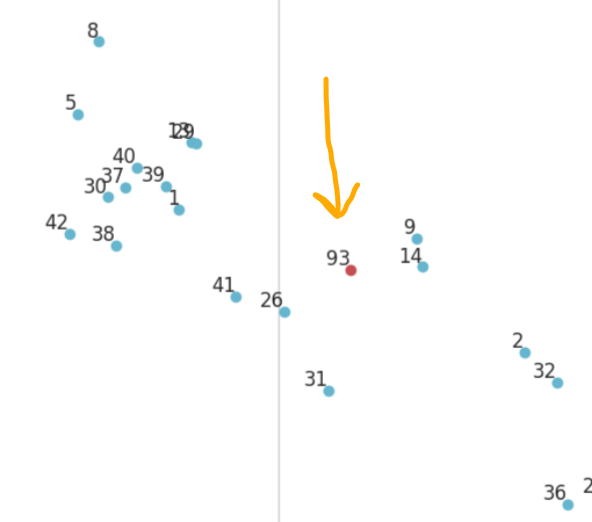

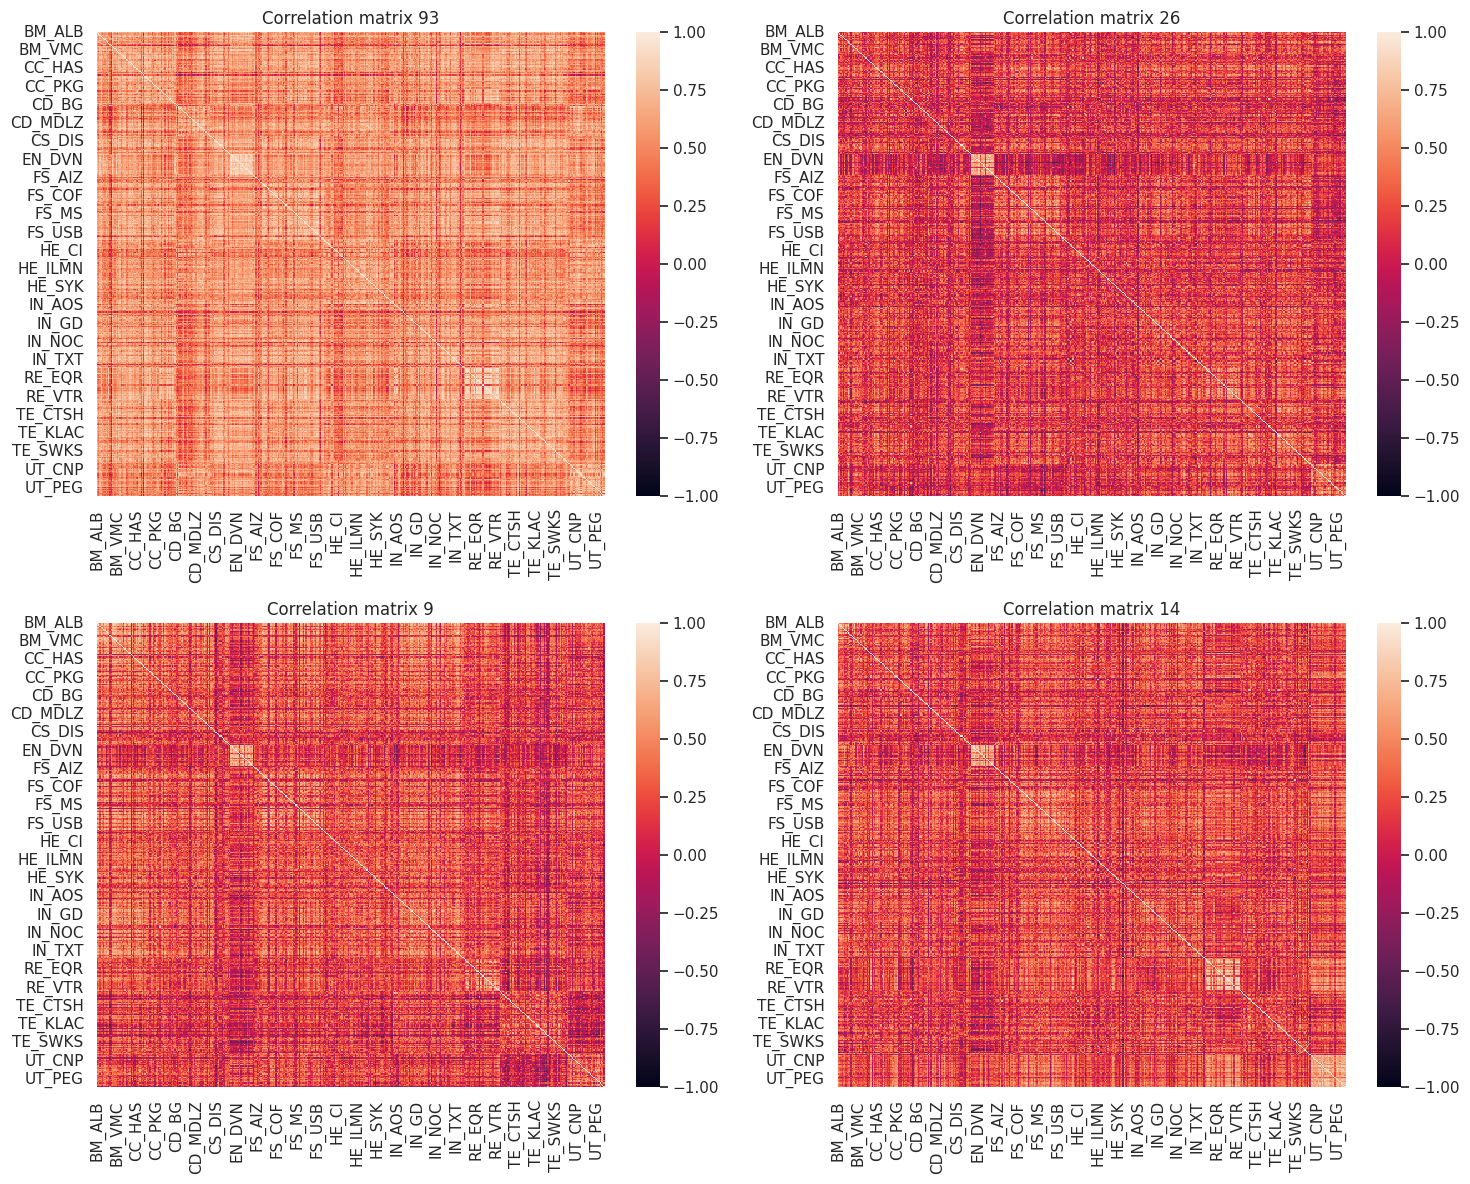

In [ ]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a list of image filenames and correlation coefficient indices
image_filenames = ['image5.png']
correlation_indices = [93, 26, 9,14]

# Display the image
display(Image(filename='image5.png', width=600, height=400, retina=True))

# Create a grid layout for displaying heatmaps
num_plots = len(correlation_indices)
num_cols = 2  # Number of columns in the grid
num_rows = - (-num_plots // num_cols)  # Ceiling division to determine the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))

# Loop through the correlation matrices and plot them in the grid
for i, idx in enumerate(correlation_indices):
    row = i // num_cols
    col = i % num_cols

    sns.heatmap(correlation_coefficients[idx], vmin=-1, vmax=1, ax=axes[row, col])
    axes[row, col].set_title(f'Correlation matrix {idx}')

# Hide empty subplots
for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


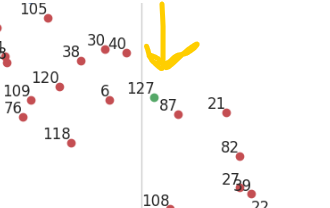

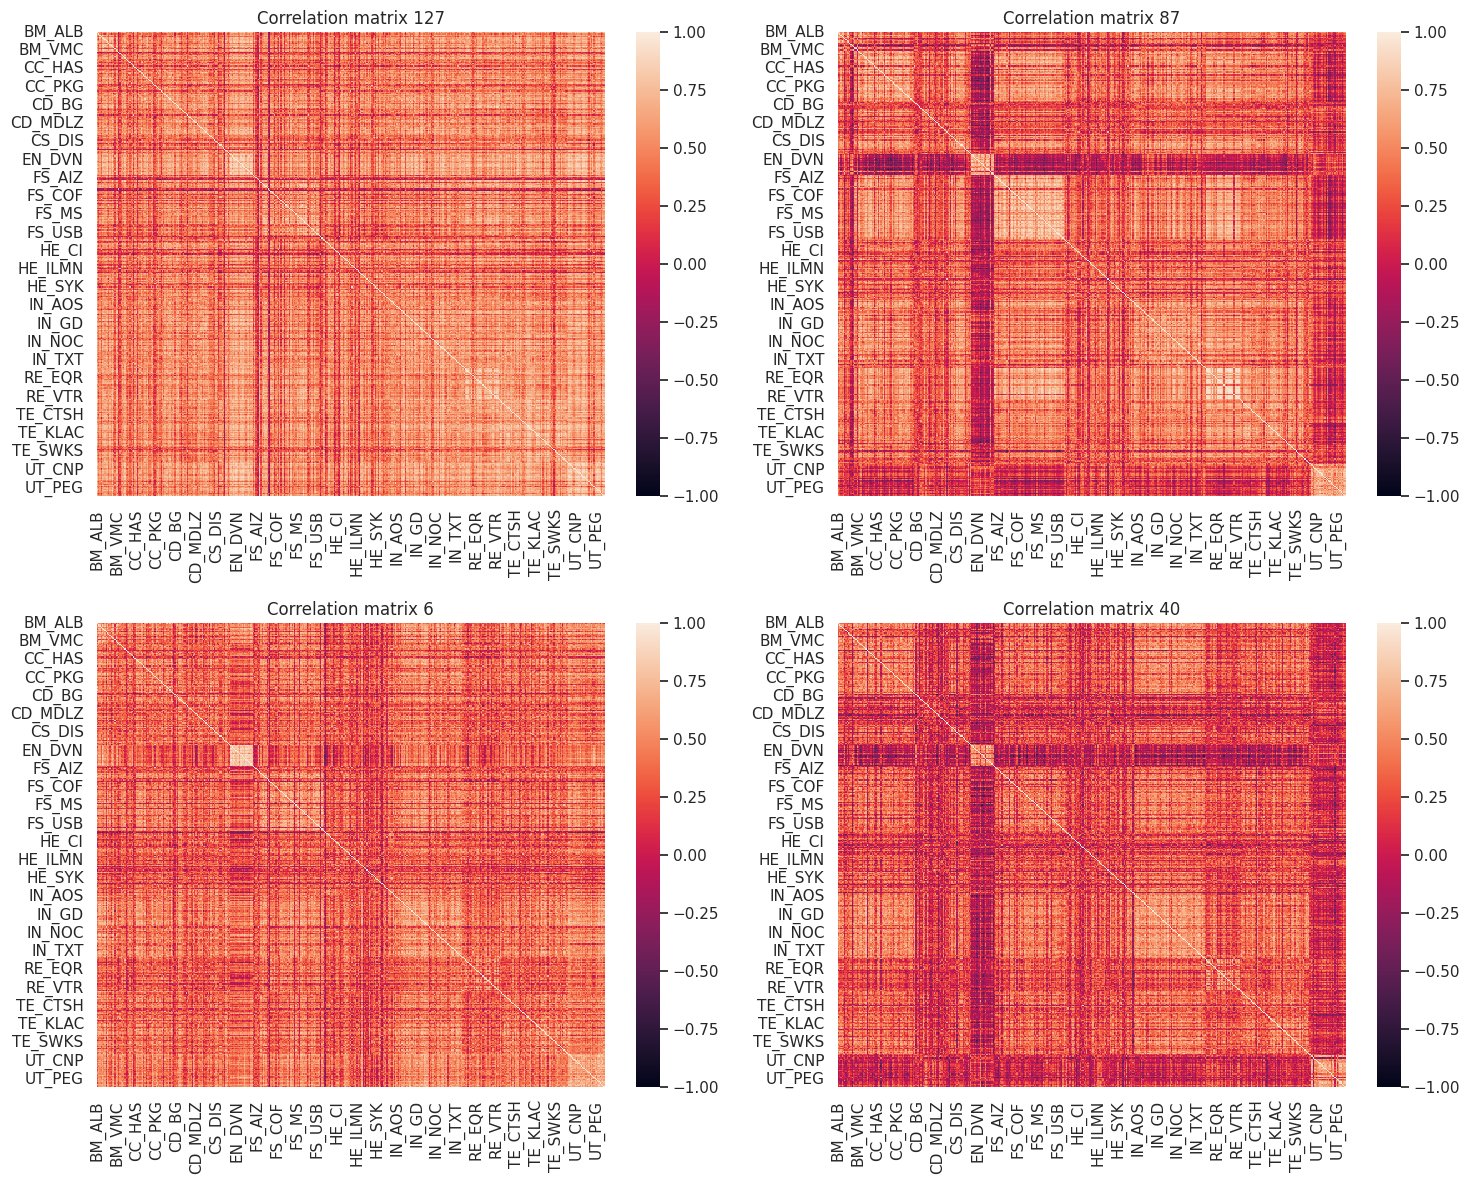

In [ ]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a list of image filenames and correlation coefficient indices
image_filenames = ['image5.png']
correlation_indices = [127, 87, 6, 40]

# Display the image
display(Image(filename='image6.png', width=600, height=400, retina=True))

# Create a grid layout for displaying heatmaps
num_plots = len(correlation_indices)
num_cols = 2  # Number of columns in the grid
num_rows = - (-num_plots // num_cols)  # Ceiling division to determine the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))

# Loop through the correlation matrices and plot them in the grid
for i, idx in enumerate(correlation_indices):
    row = i // num_cols
    col = i % num_cols

    sns.heatmap(correlation_coefficients[idx], vmin=-1, vmax=1, ax=axes[row, col])
    axes[row, col].set_title(f'Correlation matrix {idx}')

# Hide empty subplots
for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()
